## imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyze

In [40]:
df = pd.read_csv("actions.csv")
df.head()

,timestep,agent_0,agent_1,agent_2,agent_3,agent_4,agent_5,agent_6,agent_7,agent_8,agent_9
0,1,0,1,0,0,0,1,1,1,1,1
1,2,0,1,1,1,0,1,0,1,1,0
2,3,1,0,1,0,1,1,0,1,0,0
3,4,0,0,0,1,1,1,1,0,1,0
4,5,0,1,1,0,0,1,0,0,0,0


In [41]:
for col in df.columns.drop("timestep"):
    counts = df[col].value_counts().sort_index()
    print(counts)

all_actions = df.drop("timestep", axis=1).stack()

# Count occurrences of each action
total_counts = all_actions.value_counts().sort_index()
print(total_counts)

agent_0
0    3535
1    6715
Name: count, dtype: int64
agent_1
0    3505
1    6745
Name: count, dtype: int64
agent_2
0    3567
1    6683
Name: count, dtype: int64
agent_3
0    3536
1    6714
Name: count, dtype: int64
agent_4
0    3582
1    6668
Name: count, dtype: int64
agent_5
0    3606
1    6644
Name: count, dtype: int64
agent_6
0    3503
1    6747
Name: count, dtype: int64
agent_7
0    3555
1    6695
Name: count, dtype: int64
agent_8
0    3466
1    6784
Name: count, dtype: int64
agent_9
0    3463
1    6787
Name: count, dtype: int64
0    35318
1    67182
Name: count, dtype: int64


lots more 1 than 0 so spending more money is more rewarding

In [42]:
agent_data = df.drop("timestep", axis=1)

# Count number of 0s and 1s in each row (across agents)
zero_counts = (agent_data == 0).sum(axis=1)
one_counts = (agent_data == 1).sum(axis=1)

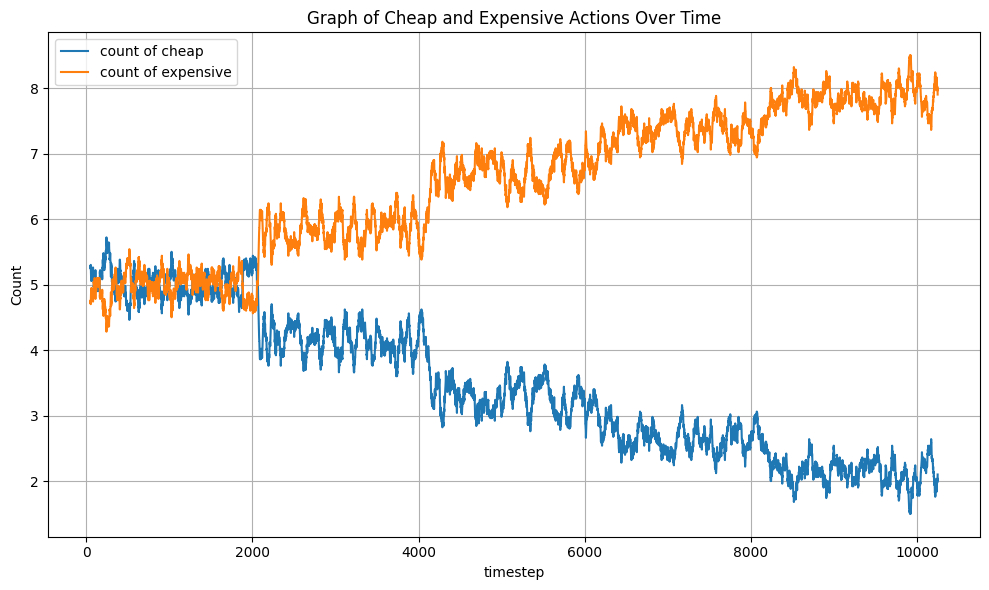

In [43]:
zero_smooth = zero_counts.rolling(window=50).mean()
one_smooth = one_counts.rolling(window=50).mean()

plt.figure(figsize=(10,6))
plt.plot(df["timestep"], zero_smooth, label="count of cheap")
plt.plot(df["timestep"], one_smooth, label="count of expensive")
plt.xlabel("timestep")
plt.ylabel("Count")
plt.title("Graph of Cheap and Expensive Actions Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()